# Exploring the MovieLens 1M Dataset

In [1]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# Import Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Read in dataset
data = pd.read_csv('./data/movie_lens_genre_separated.tsv', sep='\t')

In [3]:
# Show the first 5 rows in the dataset
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Children's


In [4]:
# More info on the dataset can be found here: http://files.grouplens.org/datasets/movielens/ml-1m-README.txt

occupation_dict = { 
    0: "not specified", 
    1: "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}

age_dict = {
    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}

In [5]:
data['age'] = [age_dict[x] for x in data['age']]
data['occupation'] = [occupation_dict[x] for x in data['occupation']]

## Objective 1: Average Rating by Genres
---

In [6]:
# Group dataset by genres and aggregate the mean ratings
mean_ratings = data.groupby('genres').agg({'rating':[np.mean]})

In [7]:
mean_ratings

,rating
,mean
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684895
Children's,3.422087
Comedy,3.522107
Crime,3.708679
Documentary,3.933123
Drama,3.766332


## Objective 2: Highest Ranked Genres by Occupation
---

In [8]:
# Group mean ratings by occupation and genres
# group_ratings = data.groupby(['occupation','genres'],as_index=False).rating.mean()

# Sort occupation in ascending order, and ratings by descending order
# top_ratings_by_occupation = group_ratings.sort_values(['occupation','rating'],ascending=[True,False])

In [9]:
# Combine above 2 steps into 1
top_ratings_by_occupation = data.groupby(["occupation","genres"],as_index=False)["rating"].mean().sort_values(["occupation","rating"],ascending=[True,False])

In [10]:
# Show top 5 highest ranked genres by occupation
top_ratings_by_occupation.groupby('occupation').head(5)

,occupation,genres,rating
9,K-12 student,Film-Noir,4.212766
16,K-12 student,War,3.880144
7,K-12 student,Drama,3.782167
5,K-12 student,Crime,3.687085
12,K-12 student,Mystery,3.636612
...,...,...,...
369,writer,Film-Noir,4.104603
366,writer,Documentary,3.967914
376,writer,War,3.798393
362,writer,Animation,3.699623


In [11]:
# Tweak the parameters to show different # of highest ranked genres by occupations

# top = 6
# occupation_num = 2

# top_ratings_by_occupation.groupby('occupation').head(top)[:top * occupation_num]

### Alternative solution: Using pivot talbe

In [12]:
# Create a pivot table of mean ratings using occupation as index and genres as columns
trbo_table = data.pivot_table('rating', index='occupation', columns='genres', aggfunc='mean')
trbo_table

genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
occupation,,,,,,,,,,,,,,,,,,
K-12 student,3.497116,3.425658,3.463956,3.220679,3.497200,3.687085,3.581633,3.782167,3.298039,4.212766,3.237795,3.556738,3.636612,3.624415,3.443795,3.554131,3.880144,3.513333
academic/educator,3.392063,3.424278,3.693399,3.459286,3.519583,3.659342,3.984887,3.754293,3.456388,4.082613,3.104548,3.701586,3.685255,3.605972,3.396863,3.526184,3.882950,3.629738
artist,3.457569,3.443535,3.624133,3.377481,3.504449,3.678039,4.028933,3.732216,3.424432,4.114000,3.243743,3.613322,3.719645,3.588446,3.500281,3.564667,3.859375,3.610483
clerical/admin,3.549025,3.556486,3.822104,3.609614,3.601516,3.742811,3.852632,3.790601,3.472675,4.075332,3.304525,3.857049,3.750000,3.704607,3.555942,3.645559,3.927692,3.626707
college/grad student,3.453687,3.419877,3.655775,3.346854,3.486595,3.723450,3.962887,3.748794,3.363636,4.039548,3.166907,3.642227,3.575105,3.558452,3.419123,3.514386,3.864107,3.519847
customer service,3.494995,3.478934,3.766940,3.513463,3.474962,3.696655,3.886598,3.739991,3.431478,4.027356,3.276987,3.641892,3.616992,3.563609,3.454210,3.542001,3.756677,3.613553
doctor/health care,3.564004,3.553981,3.681150,3.485747,3.585793,3.802857,4.013245,3.871756,3.486842,4.011348,3.256988,3.650061,3.784888,3.711271,3.471823,3.650789,4.005054,3.735007
executive/managerial,3.568687,3.509195,3.698059,3.442969,3.517354,3.736324,3.915134,3.766663,3.471070,4.030027,3.223292,3.665550,3.678220,3.615156,3.501961,3.625448,3.911164,3.635993
farmer,3.449309,3.397727,3.529851,3.229885,3.481363,3.575758,3.900000,3.627545,3.407895,3.878049,3.010989,3.560000,3.487805,3.573727,3.405455,3.454728,3.780488,3.705882


In [13]:
# This would retrieve the top 5 ranked genres by K-12 students
trbo_table.iloc[0].sort_values(ascending=False)[0:5].to_frame()

,K-12 student
genres,
Film-Noir,4.212766
War,3.880144
Drama,3.782167
Crime,3.687085
Mystery,3.636612


In [14]:
# Store the top 5 ranked genres by each occupation and print
res = []
for i in range(len(trbo_table.index)):
    res.append(trbo_table.iloc[i].sort_values(ascending=False)[0:5].to_frame())
    
res

[           K-12 student
 genres                 
 Film-Noir      4.212766
 War            3.880144
 Drama          3.782167
 Crime          3.687085
 Mystery        3.636612,
              academic/educator
 genres                        
 Film-Noir             4.082613
 Documentary           3.984887
 War                   3.882950
 Drama                 3.754293
 Musical               3.701586,
                artist
 genres               
 Film-Noir    4.114000
 Documentary  4.028933
 War          3.859375
 Drama        3.732216
 Mystery      3.719645,
              clerical/admin
 genres                     
 Film-Noir          4.075332
 War                3.927692
 Musical            3.857049
 Documentary        3.852632
 Animation          3.822104,
              college/grad student
 genres                           
 Film-Noir                4.039548
 Documentary              3.962887
 War                      3.864107
 Drama                    3.748794
 Crime                 

## Objective 3: Most Popular Movie by Age Group
---

In [15]:
# Group data by age group and title, summing up the count
group_age = pd.DataFrame(data.groupby(['age','title']).size())

In [16]:
# Rename a column called Count, which will be a duplicate column from the previous step
group_age["Count"] = group_age

# Delete the original count column with header 0
del group_age[0]

In [17]:
group_age = group_age.sort_values(["age","Count"],ascending=[True,False])

In [18]:
group_age.groupby('age').head(1)

,,Count
age,title,
18-24,Star Wars: Episode VI - Return of the Jedi (1983),2930
25-34,Star Wars: Episode V - The Empire Strikes Back (1980),5880
35-44,Star Wars: Episode V - The Empire Strikes Back (1980),2990
45-49,Star Wars: Episode V - The Empire Strikes Back (1980),1130
50-55,Star Wars: Episode V - The Empire Strikes Back (1980),1030
56+,Star Wars: Episode V - The Empire Strikes Back (1980),565
Under 18,Star Wars: Episode VI - Return of the Jedi (1983),500


## Objective 4: Breakdown of a Movie's Rating by Occupation
---

In [19]:
# Create a pivot table of movie title with rating by occupation
ratings_by_occupation = data.pivot_table('rating',index='title',columns='occupation',fill_value=0)

In [20]:
# Query the rating by occupation with a given title
ratings_by_occupation.query('title == ["Star Wars: Episode V - The Empire Strikes Back (1980)"]')

occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,not specified,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
title,,,,,,,,,,,,,,,,,,,,,
Star Wars: Episode V - The Empire Strikes Back (1980),4.211765,4.153846,4.279412,4.207792,4.386861,4.322034,4.343137,4.271386,4.111111,3.75,...,4.28012,4.471366,4.170732,4.315068,4.306818,4.201754,4.369004,4.185185,4.153846,4.261438


## Objective 5: A "Search" Function by User ID
---
In this section, we'll craft a function that given a user id, returns:(1) this user's age and occupation, (2)
the average rating given by this user, and (3) his highest and lowest rated movie(s)

In [21]:
def search_user(uid):
    user_info = data[data.user_id == uid]
    age = user_info.loc[user_info.index[0], 'age']
    occupation = user_info.loc[user_info.index[0], 'occupation']
    
    grouped_info = user_info.groupby('title').rating.mean().reset_index(name="rating").sort_values(["rating"],ascending=False)
    average_rating = round(grouped_info["rating"].mean(), 4)
    
    highest_rated_movies = grouped_info.loc[grouped_info['rating'] == grouped_info['rating'].iloc[0]]['title'].tolist()
    lowest_rated_movies = grouped_info.loc[grouped_info['rating'] == grouped_info['rating'].iloc[-1]]['title'].tolist()
    
    return age, occupation, average_rating, lowest_rated_movies, highest_rated_movies

In [22]:
# Example of the search with user_id #1
search_user(1)

('Under 18',
 'K-12 student',
 4.1887,
 ['My Fair Lady (1964)',
  'Princess Bride, The (1987)',
  'Tarzan (1999)',
  'Close Shave, A (1995)',
  'James and the Giant Peach (1996)',
  'Pleasantville (1998)',
  'Wallace & Gromit: The Best of Aardman Animation (1996)',
  'Meet Joe Black (1998)'],
 ['Last Days of Disco, The (1998)',
  "One Flew Over the Cuckoo's Nest (1975)",
  'Rain Man (1988)',
  'Dumbo (1941)',
  'Sound of Music, The (1965)',
  'Pocahontas (1995)',
  'Cinderella (1950)',
  'Christmas Story, A (1983)',
  "Schindler's List (1993)",
  "Bug's Life, A (1998)",
  'Ben-Hur (1959)',
  'Beauty and the Beast (1991)',
  'Toy Story (1995)',
  'Back to the Future (1985)',
  'Awakenings (1990)',
  'Apollo 13 (1995)',
  'Mary Poppins (1964)',
  'Saving Private Ryan (1998)'])

In [23]:
# Another example of search with user_id #42
# search_user(42)

## Objective 6: Other Observations
---
In this section, I will cover some other statistic, figure, aggregate, and plots about this dataset.

### Is the viewer's taste dependent on gender?
One interesting question we'll look into here is: do males and females have different taste or likings for certain genres in general? This question is particularly interesting, because people seem to have the stereotype of males liking action and sci-fi more, while females prefer genres like romance, fantasy, drama and such.

Let's see if we can find out our answer from the data.

In [24]:
# Aggregate average ratings by genres and gender
# genres_by_gender = data.groupby(['genres','gender']).agg({'rating':np.mean})
# genres_by_gender

# Meh, this is hard-to-read data

In [25]:
# Create a pivot table with genres by gender
genres_by_gender = data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')
genres_by_gender.head(5)

# Much better

gender,F,M
genres,,
Action,3.490252,3.491386
Adventure,3.512879,3.468125
Animation,3.744785,3.661336
Children's,3.572628,3.358998
Comedy,3.571955,3.503671


In [26]:
top_female_genres = genres_by_gender.sort_values(by='F', ascending=False)
top_female_genres.index.values.tolist()[:5]

['Film-Noir', 'Documentary', 'War', 'Musical', 'Drama']

In [27]:
top_male_genres = genres_by_gender.sort_values(by='M', ascending=False)
top_male_genres.index.values.tolist()[:5]

['Film-Noir', 'Documentary', 'War', 'Drama', 'Crime']

Interestingly enough, it appears that the 3 highest rated genres of the top 5 for both male and female are (1) film-noir, (2) documentary, and (3) war. Sounds like their tastes aren't much different, right?

But, wait! Hold on a second! 

I'm suspicious that doesn't tell the whole story. We might want to look into the differences in their ratings toward each genre and see if they agree on the genres in terms of ratings. In this case, let's take the numerical difference between ratings by male and female and plot our results.

In [28]:
# Compute a column with difference
genres_by_gender['difference'] = genres_by_gender['M'] - genres_by_gender['F']
genres_by_gender

gender,F,M,difference
genres,,,
Action,3.490252,3.491386,0.001134
Adventure,3.512879,3.468125,-0.044753
Animation,3.744785,3.661336,-0.083449
Children's,3.572628,3.358998,-0.213630
Comedy,3.571955,3.503671,-0.068285
Crime,3.689332,3.713720,0.024388
Documentary,3.946392,3.928811,-0.017581
Drama,3.765662,3.766589,0.000927
Fantasy,3.513076,3.426603,-0.086473


In [29]:
# Sort the values from column 'difference'
differences_by_gender = genres_by_gender['difference'].sort_values()
differences_by_gender.head(10)

genres
Children's    -0.213630
Musical       -0.212775
Romance       -0.100317
Fantasy       -0.086473
Animation     -0.083449
Comedy        -0.068285
Adventure     -0.044753
Mystery       -0.024539
Documentary   -0.017581
Thriller      -0.003675
Name: difference, dtype: float64

Difference values higher than 0 means the genres are favored by male, whereas the opposite means the genres are favored by female.

Text(0.5, 0, 'Average Rating Difference')

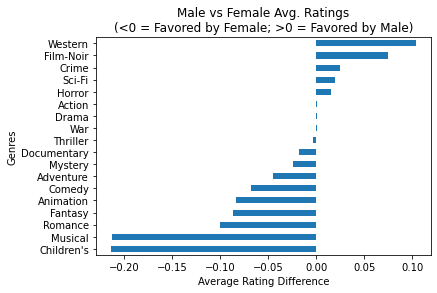

In [30]:
# Plot our results
differences_by_gender.plot(kind='barh')
plt.title('Male vs Female Avg. Ratings\n(<0 = Favored by Female; >0 = Favored by Male)')
plt.ylabel('Genres')
plt.xlabel('Average Rating Difference')

After plotting the result of differences in the average ratings between male and female for each genre, we can observe that there exists a significant difference in the viewers' genre preference across genders. Relatively speaking, female viewers prefer Children's and Musical much more than male viewers do, and male viewers favor Western and Film-Noir more.

### Is the age a key factor for the viewer's taste?
The next question that comes to my mind is: how about the age? Does the age group of the viewer play a key role in the ratings for movies from certain genres?

Similarly, we can solve this question by extracting userful information from the data.

In [31]:
# Create a pivot table with genres by age
genres_by_age = data.pivot_table('rating', index='genres', columns='age', aggfunc='mean')
genres_by_age.head(5)

age,18-24,25-34,35-44,45-49,50-55,56+,Under 18
genres,,,,,,,
Action,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709,3.506385
Adventure,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064,3.449975
Animation,3.624124,3.701118,3.740764,3.734856,3.780020,3.756233,3.476113
Children's,3.294382,3.426846,3.518598,3.527593,3.556555,3.621822,3.241642
Comedy,3.460440,3.490378,3.562017,3.591789,3.646868,3.650949,3.497491


In [32]:
# Get overall ratings for each genre
# genres_by_age['average'] = genres_by_age.mean(axis=1)
genres_by_age['average'] = data.groupby('genres').agg({'rating':[np.mean]})['rating']
genres_by_age

age,18-24,25-34,35-44,45-49,50-55,56+,Under 18,average
genres,,,,,,,,
Action,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709,3.506385,3.491185
Adventure,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064,3.449975,3.477257
Animation,3.624124,3.701118,3.740764,3.734856,3.780020,3.756233,3.476113,3.684895
Children's,3.294382,3.426846,3.518598,3.527593,3.556555,3.621822,3.241642,3.422087
Comedy,3.460440,3.490378,3.562017,3.591789,3.646868,3.650949,3.497491,3.522107
Crime,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549,3.710170,3.708679
Documentary,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538,3.730769,3.933123
Drama,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465,3.794735,3.766332
Fantasy,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700,3.317647,3.447371


An initial mistake I made here is to take the simple arithmetic average from the overall average for each age group. This is inaccurate because that would not reflect all ratings. The correct way is to take the ratings from Objective 1, which has the average rating for each particular genre.

In [33]:
# Make a copy of genres by age to manipulate on
genres_by_age_diff = genres_by_age
genres_by_age_diff['diff_18-24'] = genres_by_age_diff['average'] - genres_by_age_diff['18-24']
genres_by_age_diff['diff_25-34'] = genres_by_age_diff['average'] - genres_by_age_diff['25-34']
genres_by_age_diff['diff_35-44'] = genres_by_age_diff['average'] - genres_by_age_diff['35-44']
genres_by_age_diff['diff_45-49'] = genres_by_age_diff['average'] - genres_by_age_diff['45-49']
genres_by_age_diff['diff_50_55'] = genres_by_age_diff['average'] - genres_by_age_diff['50-55']
genres_by_age_diff['diff_56+'] = genres_by_age_diff['average'] - genres_by_age_diff['56+']
genres_by_age_diff['diff_under 18'] = genres_by_age_diff['average'] - genres_by_age_diff['Under 18']

In [34]:
del genres_by_age_diff['18-24'], genres_by_age_diff['25-34'], genres_by_age_diff['35-44'], genres_by_age_diff['45-49'], genres_by_age_diff['50-55'], genres_by_age_diff['56+'], genres_by_age_diff['Under 18']

In [35]:
genres_by_age_diff

age,average,diff_18-24,diff_25-34,diff_35-44,diff_45-49,diff_50_55,diff_56+,diff_under 18
genres,,,,,,,,
Action,3.491185,0.044088,0.037827,-0.046922,-0.037358,-0.120148,-0.119524,-0.015200
Adventure,3.477257,0.068732,0.034094,-0.038034,-0.051706,-0.150906,-0.171807,0.027282
Animation,3.684895,0.060771,-0.016223,-0.055869,-0.049962,-0.095125,-0.071338,0.208782
Children's,3.422087,0.127705,-0.004759,-0.096511,-0.105505,-0.134468,-0.199735,0.180445
Comedy,3.522107,0.061666,0.031729,-0.039911,-0.069683,-0.124761,-0.128842,0.024615
Crime,3.708679,0.040624,0.028358,-0.025058,-0.041983,-0.102010,-0.123870,-0.001492
Documentary,3.933123,0.067258,-0.013567,-0.020624,-0.033398,0.025015,-0.028416,0.202353
Drama,3.766332,0.044403,0.039904,-0.016179,-0.018024,-0.112083,-0.167132,-0.028402
Fantasy,3.447371,0.093593,-0.005114,-0.034930,-0.085097,-0.134200,-0.085330,0.129724


Text(0.5, 0, 'Average Rating Difference')

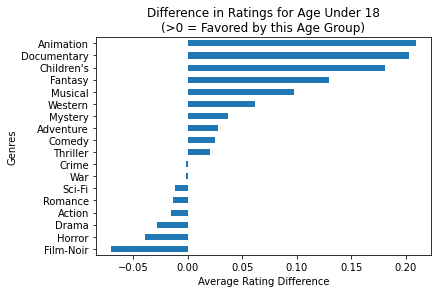

In [36]:
# Plot rating difference for age under 18
diff_by_ageunder18 = genres_by_age_diff['diff_under 18'].sort_values()
diff_by_ageunder18.plot(kind='barh')
plt.title('Difference in Ratings for Age Under 18\n(>0 = Favored by this Age Group)')
plt.ylabel('Genres')
plt.xlabel('Average Rating Difference')

Text(0.5, 0, 'Average Rating Difference')

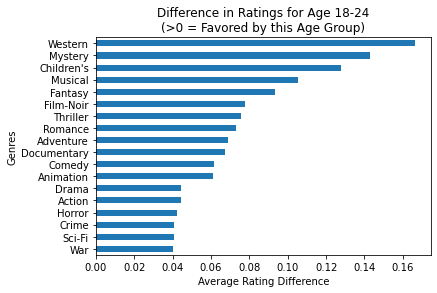

In [37]:
# Plot rating difference for age 18-24
diff_by_age18 = genres_by_age_diff['diff_18-24'].sort_values()
diff_by_age18.plot(kind='barh')
plt.title('Difference in Ratings for Age 18-24\n(>0 = Favored by this Age Group)')
plt.ylabel('Genres')
plt.xlabel('Average Rating Difference')

Text(0.5, 0, 'Average Rating Difference')

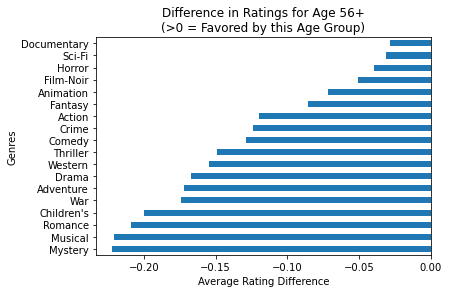

In [38]:
# Plot rating difference for age above 56
diff_by_age56 = genres_by_age_diff['diff_56+'].sort_values()
diff_by_age56.plot(kind='barh')
plt.title('Difference in Ratings for Age 56+\n(>0 = Favored by this Age Group)')
plt.ylabel('Genres')
plt.xlabel('Average Rating Difference')

By taking a brief look at the above 3 age groups, we can see that each age group has a liking or disliking toward certain genre. 

For instance, viewers in the age group under 18 give a higher rating than the overall average on Animation, Documentary, Children's, and Fantasy, and they also show slight disliking for films in Film-Noir, Horror, and Drama. On the other hand, viewers from the age group 18 to 24 appear to rate everything higher than the overall average, whereas those with age above 56 rate everything lower.

## Extra: How I Come to The Solution for Objective 5
---

Below is my thought process of working through the objective in crafting the function. You don't have to read through this, because it's just my personal notes on how I got to the answers :)

In [39]:
# Set a user_id to be used for search
uid = 5

#### User's Age and Occupation
To solve this sub-problem, we can simply do so by getting all rows of data with matching user ID and extracting the age and occupation from any row of that data using **.loc**.

In [40]:
# Select data with the column 'user_id' = given uid
user_info = data[data.user_id == uid]

In [41]:
user_info.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
4603,5,3408,3,978242323,M,25-34,writer,55455,Erin Brockovich (2000),Drama
5923,5,2355,5,978241981,M,25-34,writer,55455,"Bug's Life, A (1998)",Animation
5924,5,2355,5,978241981,M,25-34,writer,55455,"Bug's Life, A (1998)",Children's
5925,5,2355,5,978241981,M,25-34,writer,55455,"Bug's Life, A (1998)",Comedy
27407,5,919,4,978241072,M,25-34,writer,55455,"Wizard of Oz, The (1939)",Adventure


In [42]:
# Using the first row of data, get the age
age = user_info.loc[user_info.index[0], 'age']
age

'25-34'

In [43]:
# Using the first row of data, get the occupation
occupation = user_info.loc[user_info.index[0], 'occupation']
occupation

'writer'

#### Average Rating Given by This User
This sub-problem gets a little tricky, in that we have to group the data by movie title, because some movies are categorized across multiple genres. For instanc, "A Bug's Life (1998)" sits across Animation, Children's, and Comedy.

If we don't group by title, our average ratings will count these titles more than once and give inaccurate result.

In [44]:
# Group data by title and sort in descending order
grouped_info = user_info.groupby('title').rating.mean().reset_index(name="rating").sort_values(["rating"],ascending=False)

In [45]:
grouped_info

,title,rating
18,Big Night (1996),5
133,Paris Is Burning (1990),5
107,"Matrix, The (1999)",5
31,"City of Lost Children, The (1995)",5
41,Delicatessen (1991),5
...,...,...
124,Night on Earth (1991),1
158,Shaft (2000),1
141,Powder (1995),1
149,"River Runs Through It, A (1992)",1


In [46]:
# Take arithmatic mean
average_rating = round(grouped_info["rating"].mean(), 4)
average_rating

3.1465

#### Highest and Lowest Rated Movies by the User
In order to solve this sub-problem, we first need to extract the highest and lowest ratings from the data. Since grouped_info is already sorted by rating in descending order, we can use **.iloc** on 0 and -1 (remember, -1 is equivalent to the last element in a data structure in p=Python) to get the highest and lowest rating score, respectively.

Once we can the high and low, we can use **.loc** to find all rows of data with matching values in the column 'rating', take only the column 'title', and convert it to a list for our solution.

In [47]:
# Step 1-1: Get the highest rating from the first row (becuase the ratings are in descending order)
highest_rating = grouped_info['rating'].iloc[0]
highest_rating

5

In [48]:
# Step 1-2: Get the lowest rating from the first row
lowest_rating = grouped_info['rating'].iloc[-1]
lowest_rating

1

In [49]:
# Step 2: Get the list of highest and lowest rated movies by this user
highest_rated_movies = grouped_info.loc[grouped_info['rating'] == highest_rating]['title'].tolist()
lowest_rated_movies = grouped_info.loc[grouped_info['rating'] == lowest_rating]['title'].tolist()

In [50]:
# In fact, we can combine step 1 and 2 into a single liner
highest_rated_movies = grouped_info.loc[grouped_info['rating'] == grouped_info['rating'].iloc[0]]['title'].tolist()
lowest_rated_movies = grouped_info.loc[grouped_info['rating'] == grouped_info['rating'].iloc[-1]]['title'].tolist()

In [51]:
# Example of the list of highest rated movies by user_id #5
highest_rated_movies[:5]

['Big Night (1996)',
 'Paris Is Burning (1990)',
 'Matrix, The (1999)',
 'City of Lost Children, The (1995)',
 'Delicatessen (1991)']